In [1]:
import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

This tutorial was done following https://saturncloud.io/blog/understanding-jupyter-notebook-widgets/ and https://ipython-books.github.io/33-mastering-widgets-in-the-jupyter-notebook/

In [7]:
# basic slider
slider0 = widgets.IntSlider(value=5, min=0, max=10, step=1)
slider0

IntSlider(value=5, max=10)

In [3]:
current_value = slider0.value
current_value

5

We can define our own sliders

In [4]:
freq_slider = widgets.FloatSlider(
    value=2.,
    min=1.,
    max=6.0,
    step=0.5,
    description='Frequency:',
    readout_format='.1f')

freq_slider

FloatSlider(value=2.0, description='Frequency:', max=6.0, min=1.0, readout_format='.1f', step=0.5)

In [5]:
range_slider = widgets.FloatRangeSlider(
    value=[-1., +1.],
    min=-5., max=+5., step=0.1,
    description='xlim:',
    readout_format='.1f')
range_slider

FloatRangeSlider(value=(-1.0, 1.0), description='xlim:', max=5.0, min=-5.0, readout_format='.1f')

In [6]:
# we can even create buttons to store booleans
grid_button = widgets.ToggleButton(
    value=False,
    description='Grid',
    icon='check')

grid_button

ToggleButton(value=False, description='Grid', icon='check')

In [7]:
# or choosing from a list of values
color_buttons = widgets.ToggleButtons(
    options=['blue', 'red', 'green'],
    description='Color:')

color_buttons

ToggleButtons(description='Color:', options=('blue', 'red', 'green'), value='blue')

In [8]:
# and writing into a textbox
title_textbox = widgets.Text(
    value='Hello World',
    description='Title:',)

title_textbox

Text(value='Hello World', description='Title:')

## function interaction

Widgets can also be used to interact with functions. The interact function from ipywidgets allows you to create a widget that interacts with a function. Here’s an example:

In [9]:
@widgets.interact(x=(0, 5))
def f(x=0):
    print(x)

interactive(children=(IntSlider(value=0, description='x', max=5), Output()), _dom_classes=('widget-interact',)…

In [10]:
@widgets.interact
def greet(name="Jupyter", count=2):
    for i in range(count):
        print(f"Hello,{name}!")

interactive(children=(Text(value='Jupyter', description='name'), IntSlider(value=2, description='count', max=6…

In [11]:
greet(count=10)

Hello,Jupyter!
Hello,Jupyter!
Hello,Jupyter!
Hello,Jupyter!
Hello,Jupyter!
Hello,Jupyter!
Hello,Jupyter!
Hello,Jupyter!
Hello,Jupyter!
Hello,Jupyter!


There is also an @interact_manual decorator which provides a button to call the function manually

In [12]:
#@widgets.interact_manual(freq=freq_slider, color=['blue', 'red', 'green'])
@widgets.interact(freq=freq_slider, color=color_buttons)
def plot(freq=4., color='blue', grid=True):
    t = np.linspace(0., +1., 1000)
    fig, ax = plt.subplots(1, 1, figsize=(5, 3))
    ax.plot(t, np.sin(2 * np.pi * freq * t),
            lw=2, color=color)
    ax.grid(grid)

interactive(children=(FloatSlider(value=2.0, description='Frequency:', max=6.0, min=1.0, readout_format='.1f',…

Now, we will see how to combine these widgets into a complex graphical user interface, and how to react to user interactions with these controls. We create a function that will display a plot as defined by the created controls.

In [29]:
plot_button = widgets.Button(description='Plot')


def plot2(b=None):
    xlim = range_slider.value
    freq = freq_slider.value
    grid = grid_button.value
    color = color_buttons.value
    title = title_textbox.value
    bgcolor = color_buttons.value

    t = np.linspace(xlim[0], xlim[1], 1000)
    f, ax = plt.subplots(1, 1, figsize=(5, 3))
    ax.plot(t, np.sin(2 * np.pi * freq * t),
            color=color)
    
    f.suptitle(title)
    ax.grid(grid)

    
# The on_click decorator of a button widget lets us react to click events
# Here, we simply declare that the plotting function should be called 
# when the plot_button is pressed:
@plot_button.on_click
def plot_on_click(b):
    plot2()

Button(description='Plot', style=ButtonStyle())

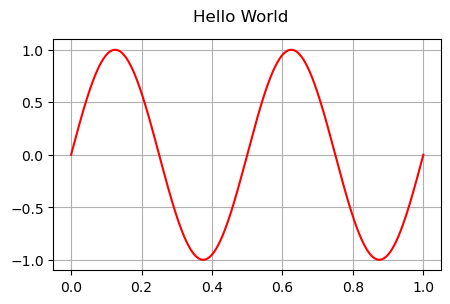

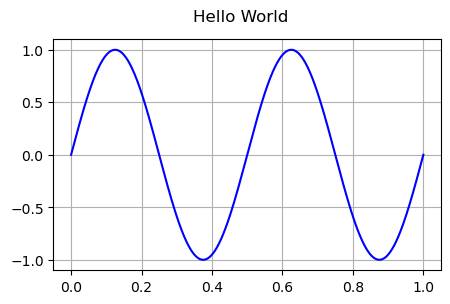

In [30]:
plot_button

To display everything nicely

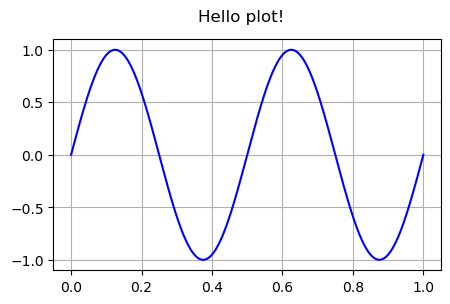

In [32]:
tab1 = VBox(children=[freq_slider,range_slider])
tab2 = VBox(children=[title_textbox,HBox(children=[color_buttons,grid_button]),])

title_textbox.value = 'Hello plot!'
tab = widgets.Tab(children=[tab1, tab2])
tab.set_title(0, 'plot')
tab.set_title(1, 'styling')
VBox(children=[tab, plot_button])

In [33]:
#@widgets.interact_manual(freq=freq_slider, color=color_buttons)
def pol_plot(freq=4., color='blue'):
    theta = np.linspace(0, 2 * np.pi, 400)
    r = np.sin(freq*theta)
    
    fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection='polar'))
    ax.plot(theta,r, color=color, linestyle='dashed')
    ax.grid(True)

widgets.interact(pol_plot, freq=freq_slider, color=color_buttons)

interactive(children=(FloatSlider(value=2.0, description='Frequency:', max=6.0, min=1.0, readout_format='.1f',…

<function __main__.pol_plot(freq=4.0, color='blue')>

## Callbacks

Widgets can be connected to Python functions, enabling you to respond to changes in widget values. Here’s an example using a slider and a function that updates a plot based on the slider’s value:

In [34]:
slider = widgets.IntSlider(value=0, min=0, max=100, step=1)
output = widgets.Output()

def handle_slider_change(change):
    with output:
        output.clear_output()
        print(f"The new slider value is: {change.new}")

In [35]:
slider.observe(handle_slider_change, 'value')
widgets.VBox([slider, output])

## Use Widgets for better Exploratory Data Analysis (EDA) experience

In this part, we are going to use some popular widgets to perform some EDA tasks such as find mean, median and plot some graphs. We are going to use the Penguine Dataset which can be found here https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?select=penguins_size.csv.

In [2]:
import pandas as pd
import seaborn as sbn

penguins = pd.read_csv('Data Science/penguins_size.csv')

# get column names
for col in penguins:
    print(col)

species
island
culmen_length_mm
culmen_depth_mm
flipper_length_mm
body_mass_g
sex


In [3]:
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
def eda_widget(sex, island, species):
    # Filter the dataset based on the selected widget values
    df = penguins[(penguins['sex'] == sex) & (penguins['island'] == island) & (penguins['species'] == species)]

    # Compute some summary statistics
    num_rows = len(df)
    mean_body_mass = df['body_mass_g'].mean()
    median_body_mass = df['body_mass_g'].median()

    sexcolors = {'MALE':'c','FEMALE':'magenta'}
    specolors = {'Adelie':'lime', 'Chinstrap':'green', 'Gentoo':'darkgreen'}
    
    # Create some plots
    fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
    #sbn.histplot(data=df, x='culmen_length_mm', hue='sex', ax=axs[0])
    sbn.histplot(data=df, x='culmen_length_mm', color=sexcolors[sex], ax=axs[0])
    axs[0].set_title('Distribution of culmen length by sex')
    #sbn.scatterplot(data=df, x='culmen_depth_mm', y='body_mass_g', hue='species')
    sbn.scatterplot(data=df, x='culmen_depth_mm', y='body_mass_g', color=specolors[species])
    axs[1].set_title('Scatter plot of culmen depth vs. body mass by species')
    plt.show()

    # Display the summary statistics
    print(f"Number of penguins: {num_rows}")
    print(f"Mean body mass: {mean_body_mass:.2f} g")
    print(f"Median body mass: {median_body_mass:.2f} g")


In [5]:
sex_widget = widgets.Dropdown(options=['MALE', 'FEMALE'], description='Sex:')
island_widget = widgets.Dropdown(options=['Biscoe', 'Dream', 'Torgersen'], description='Island:')
species_widget = widgets.Dropdown(options=['Adelie', 'Chinstrap', 'Gentoo'], description='Species:')

In [6]:
widgets.interact(eda_widget, sex=sex_widget, island=island_widget, species=species_widget);

interactive(children=(Dropdown(description='Sex:', options=('MALE', 'FEMALE'), value='MALE'), Dropdown(descrip…